In [13]:
!python test_reductions.py

/Users/tabeafry/Master/FortgeschritteneMethodenDerBioinformatik/clique-cover-lp/src/reductions/reductions.py:30: SyntaxWarning: invalid escape sequence '\{'
  a ∈ N(u)\{v}, b ∈ N(w)\{v}, the edge (a, b) must exist.
test_crown_reduction (__main__.TestCrownReduction.test_crown_reduction)
Test ob die Crown Reduction bei diesem Graphen funktioniert. ... 
=== Crown Reduction Test Setup ===
Graph nodes: [1, 2, 3, 4, 5, 6, 7, 8]
Graph edges: [(1, 6), (2, 6), (3, 6), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 7), (6, 8), (7, 8)]
Expected I (independent set): [1, 2, 3, 4]
Expected H (to be matched): [5, 6]

=== Before Crown Reduction ===
Maximum matching: {(8, 7), (6, 1), (5, 4)}
Matched nodes: [1, 4, 5, 6, 7, 8]
Unmatched nodes: [2, 3]

=== After Crown Reduction ===
Changed: False
Crown sets found: []
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8]
Remaining edges: [(1, 6), (2, 6), (3, 6), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 7), (6, 8), (7, 8)]
FAIL
test_crown_reduction_alternative (__main_

In [15]:
%run test_reductions.py

test_crown_reduction (__main__.TestCrownReduction.test_crown_reduction)
Test ob die Crown Reduction bei diesem Graphen funktioniert. ... FAIL
test_crown_reduction_alternative (__main__.TestCrownReductionAlternative.test_crown_reduction_alternative)
Test der alternativen Crown-Struktur. ... skipped 'Graph has no crown structure'
test_degree_two_folding (__main__.TestDegreeTwoFolding.test_degree_two_folding) ... FAIL
test_domination (__main__.TestDominationReduction.test_domination) ... ok
test_isolated_vertex_reduction (__main__.TestIsolatedVertexReduction.test_isolated_vertex_reduction) ... ok
test_twin_folding (__main__.TestTwinFolding.test_twin_folding) ... ERROR
test_twin_removal (__main__.TestTwinRemoval.test_twin_removal) ... ERROR

ERROR: test_twin_folding (__main__.TestTwinFolding.test_twin_folding)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/tabeafry/Master/FortgeschritteneMethodenDerBioinformatik/cliq


=== Crown Reduction Test Setup ===
Graph nodes: [1, 2, 3, 4, 5, 6, 7, 8]
Graph edges: [(1, 6), (2, 6), (3, 6), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 7), (6, 8), (7, 8)]
Expected I (independent set): [1, 2, 3, 4]
Expected H (to be matched): [5, 6]

=== Before Crown Reduction ===
Maximum matching: {(8, 7), (6, 1), (5, 4)}
Matched nodes: [1, 4, 5, 6, 7, 8]
Unmatched nodes: [2, 3]

=== After Crown Reduction ===
Changed: False
Crown sets found: []
Remaining nodes: [1, 2, 3, 4, 5, 6, 7, 8]
Remaining edges: [(1, 6), (2, 6), (3, 6), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 7), (6, 8), (7, 8)]

=== Alternative Crown Test Setup ===
Graph: [(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 4), (2, 5), (3, 4)]
Matching: {(5, 1), (4, 2), (3, 0)}
Changed: False
Crown sets: []
Remaining: [0, 1, 2, 3, 4, 5]
No crown found - this graph might not have a crown structure
Reductions applied (degree two folding): [(2, 1, 4)]
Reductions applied (domination): [1]
Reductions applied (isolated vertex): [4, 

SystemExit: 1

In [31]:
%run test_reductions.py

test_crown_reduction (__main__.TestCrownReduction.test_crown_reduction) ... ok
test_degree_two_folding (__main__.TestDegreeTwoFolding.test_degree_two_folding) ... ok
test_domination (__main__.TestDominationReduction.test_domination) ... ok
test_isolated_vertex_reduction (__main__.TestIsolatedVertexReduction.test_isolated_vertex_reduction) ... ok
test_twin_folding (__main__.TestTwinFolding.test_twin_folding) ... ok
test_twin_removal (__main__.TestTwinRemoval.test_twin_removal) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.043s

OK


Removed nodes (crown_reduction): [([1, 2, 3], [4, 5], [(4, 1), (5, 2)], [3])]
Reductions applied (degree two folding): [(1, 2, 3)]
Reductions applied (domination): [1]
Reductions applied (isolated vertex): [4, 5]
Folded nodes (twin folding): ['1_2_folded']
Reductions applied (twin removal): [(4, 5, {1, 2, 3})]


In [8]:
import unittest
import networkx as nx
from reductions import apply_degree_two_folding

# Define the test case class
class TestDegreeTwoFolding(unittest.TestCase):
    def setUp(self):
        # Create a simple graph with a degree-2 foldable node
        self.G = nx.Graph()
        self.G.add_edges_from([(1, 2), (1, 3)])
        self.G.add_edge(2, 4)
        self.G.add_edge(2, 5)
        self.G.add_edge(3, 6)
        self.G.add_edge(3, 7)

    def test_degree_two_folding(self):
        print("Initial graph nodes:", self.G.nodes)
        # Use the function from the current context
        G_folded, changed, folds, VCC_addition = apply_degree_two_folding(self.G.copy())
        print("Graph after folding nodes:", G_folded.nodes)
        print(f"folded nodes: {folds}")
        self.assertTrue(changed, "Graph should have changed due to folding.")
        self.assertEqual(len(folds), 1, "One fold should have occurred.")

        v, u, w = folds[0]
        self.assertIn(f"fold_{v}", G_folded.nodes, "Folded node should exist.")
        folded_neighbors = set(G_folded.neighbors(f"fold_{v}"))
        self.assertEqual(folded_neighbors, {4, 5, 6, 7}, "Folded node should connect to external neighbors of u and w.")

        for node in (v, u, w):
            self.assertNotIn(node, G_folded.nodes, f"Node {node} should have been removed.")

# Run the test
suite = unittest.TestLoader().loadTestsFromTestCase(TestDegreeTwoFolding)
unittest.TextTestRunner(verbosity=2).run(suite)

test_degree_two_folding (__main__.TestDegreeTwoFolding.test_degree_two_folding) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.013s

OK


Initial graph nodes: [1, 2, 3, 4, 5, 6, 7]
Graph after folding nodes: [4, 5, 6, 7, 'fold_1']
folded nodes: [(1, 2, 3)]


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [9]:
import unittest
import networkx as nx
from reductions import apply_isolated_vertex_reduction

# Define the test case class
class TestIsolatedVertexReduction(unittest.TestCase):
    def setUp(self):
        # Create a simple graph with isolated vertices
        self.G = nx.Graph()
        self.G.add_edges_from([(1, 2), (2, 3)])
        self.G.add_node(4)  # Isolated vertex
        self.G.add_node(5)  # Another isolated vertex

    def test_isolated_vertex_reduction(self):
        # Use the function from the current context
        G_reduced, changed, removed, VCC_addition = apply_isolated_vertex_reduction(self.G.copy())
        print(f"removed nodes: {removed} and clique cover addition: {VCC_addition}")
        self.assertTrue(changed, "Graph should have changed due to isolated vertex removal.")
        self.assertIn(4, removed, "Isolated vertex 4 should have been removed.")
        self.assertIn(5, removed, "Isolated vertex 5 should have been removed.")
        self.assertNotIn(4, G_reduced.nodes, "Isolated vertex 4 should not be in the reduced graph.")
        self.assertNotIn(5, G_reduced.nodes, "Isolated vertex 5 should not be in the reduced graph.")


# Run the test
suite = unittest.TestLoader().loadTestsFromTestCase(TestIsolatedVertexReduction)
unittest.TextTestRunner(verbosity=2).run(suite)

test_isolated_vertex_reduction (__main__.TestIsolatedVertexReduction.test_isolated_vertex_reduction) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.022s

OK


removed nodes: [4, 5] and clique cover addition: 2


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [6]:
import unittest
import networkx as nx
from reductions import apply_twin_folding_or_removal

class TestTwinRemoval(unittest.TestCase):
    def setUp(self):
        # Create a graph with twin nodes
        self.G = nx.Graph()
        self.G.add_edges_from([(1, 4), (2, 4), (3, 4)])
        self.G.add_edges_from([(1, 5), (2, 5), (3, 5)])
        self.G.add_edge(1, 2)
        self.G.add_edges_from([(1, 6), (2, 7)])


    def test_twin_removal(self):
        G_reduced, changed, removed, VCC_additional = apply_twin_folding_or_removal(self.G.copy())
        #print("Reductions applied (twin_removal):", [name for name, _ in removed])
        print(f"removed nodes: {removed} and clique cover addition: {VCC_additional}")
        print(f"nodes after removal {G_reduced.nodes} and edges after removal: {G_reduced.edges}")
        self.assertTrue(changed, "Graph should have changed due to twin removal.")
        self.assertLess(len(G_reduced.nodes), 5, "Graph should have fewer than 6 nodes after twin removal.")
        self.assertNotIn(4, G_reduced.nodes, "Node 4 should have been removed as a twin.")
        self.assertNotIn(5, G_reduced.nodes, "Node 5 should have been removed as a twin.")


# Run the test
suite = unittest.TestLoader().loadTestsFromTestCase(TestTwinRemoval)
unittest.TextTestRunner(verbosity=2).run(suite)

test_twin_removal (__main__.TestTwinRemoval.test_twin_removal) ... FAIL

FAIL: test_twin_removal (__main__.TestTwinRemoval.test_twin_removal)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/var/folders/t_/s65wyw3x6s14tb20670jblyr0000gn/T/ipykernel_90160/1215839579.py", line 20, in test_twin_removal
    self.assertTrue(changed, "Graph should have changed due to twin removal.")
AssertionError: False is not true : Graph should have changed due to twin removal.

----------------------------------------------------------------------
Ran 1 test in 0.008s

FAILED (failures=1)


removed nodes: [] and clique cover addition: 0
nodes after removal [1, 4, 2, 3, 5, 6, 7] and edges after removal: [(1, 4), (1, 5), (1, 2), (1, 6), (4, 2), (4, 3), (2, 5), (2, 7), (3, 5), (6, 7)]


<unittest.runner.TextTestResult run=1 errors=0 failures=1>

In [7]:
import unittest
import networkx as nx
from reductions import apply_twin_folding_or_removal

class TestTwinFolding(unittest.TestCase):
    def setUp(self):
        # Create a graph with twin nodes
        self.G = nx.Graph()
        self.G.add_edges_from([(1, 4), (1, 5), (1, 6),
                               (2, 4), (2, 5), (2, 6)])
        self.G.add_edges_from([(4, 7), (5, 8)])
        # self.G.add_edges_from([(7, 8)]) # this should lead to no reduction because of the crossing independence

    def test_twin_folding(self):
        G_reduced, changed, folds, VCC_addition = apply_twin_folding_or_removal(self.G.copy())
#        print("Reductions applied (twin_folding):", [name for name, _ in folds])
        print("Folded nodes:", folds)
        print(f"edges after folding: {G_reduced.edges}")
        self.assertTrue(changed, "Graph should have changed due to twin folding.")
#        self.assertTrue(any("twin_folding" in name.lower() for name, _ in folds), "Twin folding should have been applied.")
        self.assertTrue(len(folds) > 0, "Twin folding should have been applied.")

# Run the test
suite = unittest.TestLoader().loadTestsFromTestCase(TestTwinFolding)
unittest.TextTestRunner(verbosity=2).run(suite)

test_twin_folding (__main__.TestTwinFolding.test_twin_folding) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


Folded nodes: [(1, 2, 4, 5, 6, '1_2_twin_folded')]
edges after folding: [(7, '1_2_twin_folded'), (8, '1_2_twin_folded')]


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [1]:
import unittest
import networkx as nx
from reductions import apply_domination_reduction

class TestDominationReduction(unittest.TestCase):
    def setUp(self):
        # Create a graph for domination reduction
        self.G = nx.Graph()
        self.G.add_edges_from([(1, 3), (2, 3), (1, 2)])

    def test_domination(self):
        G_reduced, changed, removed, VCC_addition = apply_domination_reduction(self.G.copy())
        print("Reductions applied (domination):", [name for name, _ in removed])
        self.assertTrue(changed, "Graph should have changed due to domination reduction.")
        self.assertLess(len(G_reduced.nodes), 3, "Graph should have fewer than 3 nodes after domination reduction.")


# Run the test
suite = unittest.TestLoader().loadTestsFromTestCase(TestDominationReduction)
unittest.TextTestRunner(verbosity=2).run(suite)

test_domination (__main__.TestDominationReduction.test_domination) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


Reductions applied (domination): [1]


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

test_crown_reduction_2 (__main__.TestCrownReduction.test_crown_reduction_2) ... 

Initial graph nodes: [70, 80, 71, 72, 73, 74, 81, 82, 83, 1, 2]
Initial graph edges: [(70, 80), (70, 81), (70, 82), (70, 83), (80, 71), (80, 72), (80, 73), (80, 74), (71, 81), (71, 82), (71, 83), (72, 81), (72, 82), (72, 83), (73, 81), (73, 82), (73, 83), (74, 81), (74, 82), (74, 83)]


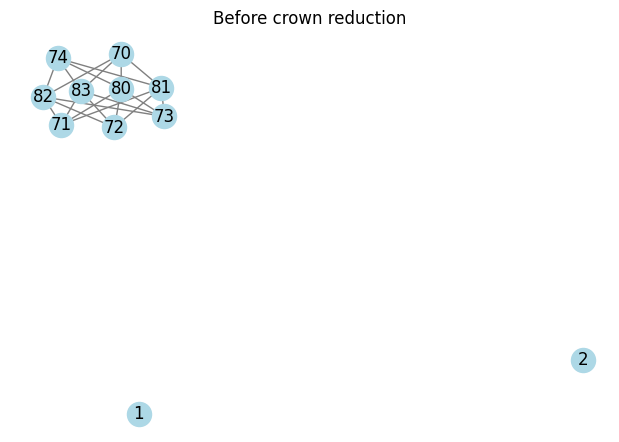

removed nodes: [([70, 71, 72, 73, 74], [80, 81, 82, 83], [(80, 70), (81, 71), (82, 72), (83, 73)], [74])]
clique cover addition: 5
remaining edges: []


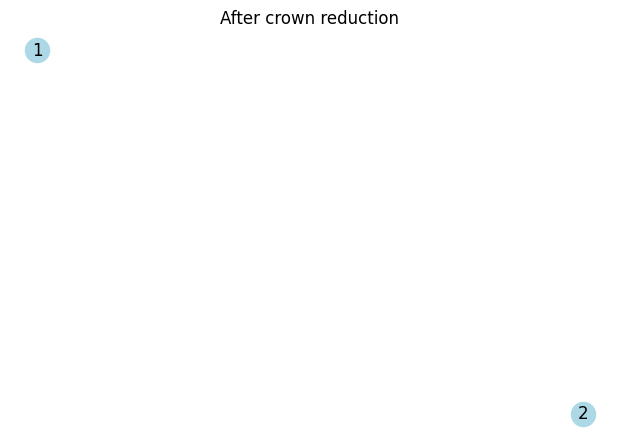

ok

----------------------------------------------------------------------
Ran 1 test in 1.001s

OK


In [4]:
import unittest
import networkx as nx
import matplotlib.pyplot as plt

class TestCrownReduction(unittest.TestCase):
    def setUp(self):
        # Create a graph for crown reduction
        self.G = nx.Graph()
        self.G.add_edges_from([
            (70, 80), (71, 80), (72, 80), (73, 80), (74, 80),
            (70, 81), (71, 81), (72, 81), (73, 81), (74, 81),
            (70, 82), (71, 82), (72, 82), (73, 82), (74, 82),
            (70, 83), (71, 83), (72, 83), (73, 83), (74, 83)
        ])
        self.G.add_node(1)
        self.G.add_node(2)

    def visualize_graph(self, G, title):
        """Helper to draw the graph."""
        plt.figure(figsize=(6, 4))
        pos = nx.spring_layout(G, seed=42)  # fixe Position für Vergleich
        nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray")
        plt.title(title)
        plt.show()

    def test_crown_reduction_2(self):
        print("Initial graph nodes:", self.G.nodes)
        print("Initial graph edges:", self.G.edges)
        self.visualize_graph(self.G, "Before crown reduction")

        G_reduced, changed, removed, VCC_addition = apply_crown_reduction(self.G.copy())

        print(f"removed nodes: {removed}")
        print(f"clique cover addition: {VCC_addition}")
        print(f"remaining edges: {G_reduced.edges}")

        self.visualize_graph(G_reduced, "After crown reduction")

        self.assertTrue(changed, "Graph should have changed due to crown reduction.")
        self.assertTrue(len(removed) > 0, "Crown reduction should have removed some nodes.")


# Run the test
if __name__ == "__main__":
    suite = unittest.TestLoader().loadTestsFromTestCase(TestCrownReduction)
    unittest.TextTestRunner(verbosity=2).run(suite)


In [49]:
import random

def is_crown(G, I, H):
    # Independent set check
    for u in I:
        for v in I:
            if u != v and G.has_edge(u, v):
                return False
    # Perfect matching check
    B = nx.Graph()
    B.add_nodes_from(H, bipartite=0)
    B.add_nodes_from(I, bipartite=1)
    for h in H:
        for i in I:
            if G.has_edge(h, i):
                B.add_edge(h, i)
    M = nx.bipartite.maximum_matching(B, top_nodes=H)
    matched_pairs = [(u, v) for u, v in M.items() if u in H and v in I]
    return len(matched_pairs) == len(H)

def random_crown_test(func, num_tests=50, max_nodes=8, edge_prob=0.3):
    for _ in range(num_tests):
        G = nx.erdos_renyi_graph(random.randint(1, max_nodes), edge_prob)
        G_before = deepcopy(G)
        while True:
            G, changed, crowns = func(G)
            for I, H, M, unmatched_I in crowns:
                assert is_crown(G_before, I, H)
            if not changed:
                break
    print(f"✅ {num_tests} random crown reduction tests passed!")

In [51]:
from reductions import apply_crown_reduction
random_crown_test(apply_crown_reduction, num_tests=300)

✅ 300 random crown reduction tests passed!


In [5]:
from reductions import apply_all_reductions
import unittest
import networkx as nx

class TestAllReductions(unittest.TestCase):

    # Create a graph for testing all reductions
    def setUp(self):
        self.G = nx.Graph()

        # Isolated vertex
        self.G.add_node(100)

        # Degree-two folding: a path
        self.G.add_edges_from([(1, 2), (2, 3)])  # 2 is degree two

        # Twin removal: nodes 10 and 11 have same neighbors and at least two of the neighbours of 10 and 11 are connected
        self.G.add_edges_from([(10, 20), (11, 20), (12, 20), (10, 21), (11, 21), (12, 21)])
        self.G.add_edges_from([(10, 13), (11, 14), (12, 15)]) # extended neighborhood

        # Twin folding: nodes 30 and 31 have identical neighbors
        self.G.add_edges_from([(30, 40), (31, 40), (30, 41), (31, 41)])

        # Domination: node 50 dominates 51 (superset of neighbors)
        self.G.add_edges_from([(50, 60), (50, 61), (51, 60), (50, 51)])

        # Crown: nodes 70-74 connected to 80-83 forming a crown structure
        self.G.add_edges_from([
            (70, 80), (71, 80), (72, 80), (73, 80), (74, 80),
            (70, 81), (71, 81), (72, 81), (73, 81), (74, 81),
            (70, 82), (71, 82), (72, 82), (73, 82), (74, 82),
            (70, 83), (71, 83), (72, 83), (73, 83), (74, 83)
        ])

    def test_all_reductions(self):
        G_reduced, trace, VCC_addition_total = apply_all_reductions(self.G.copy(), verbose=False, timing=False)
        print(f"Reduced graph nodes: {G_reduced.nodes}")
        print(f"Reduced graph edges: {G_reduced.edges}")
        print(f"VCC additions: {VCC_addition_total}")
        for name, detail in trace:
            print(f"Applied: {name}, Details: {detail}")

        self.assertTrue(any("isolated" in name.lower() for name, _ in trace), "Isolated vertex reduction should have been applied.")
        self.assertTrue(any("degree_two_folding" in name.lower() for name, _ in trace), "Degree two folding should have been applied.")
        self.assertTrue(any("twin_removal" in name.lower() for name, _ in trace), "Twin removal should have been applied.")
        self.assertTrue(any("twin_folding" in name.lower() for name, _ in trace), "Twin folding should have been applied.")
        self.assertTrue(any("domination" in name.lower() for name, _ in trace), "Domination reduction should have been applied.")
        self.assertTrue(any("crown" in name.lower() for name, _ in trace), "Crown reduction should have been applied.")

# Run the test
suite = unittest.TestLoader().loadTestsFromTestCase(TestAllReductions)
unittest.TextTestRunner(verbosity=2).run(suite)

test_all_reductions (__main__.TestAllReductions.test_all_reductions) ... FAIL

FAIL: test_all_reductions (__main__.TestAllReductions.test_all_reductions)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/var/folders/t_/s65wyw3x6s14tb20670jblyr0000gn/T/ipykernel_84743/3432548046.py", line 45, in test_all_reductions
    self.assertTrue(any("twin_removal" in name.lower() for name, _ in trace), "Twin removal should have been applied.")
AssertionError: False is not true : Twin removal should have been applied.

----------------------------------------------------------------------
Ran 1 test in 0.014s

FAILED (failures=1)


Reduced graph nodes: [20, 21, 13, 14, 15, 31, 60, 61]
Reduced graph edges: []
VCC additions: 8
Applied: apply_isolated_vertex_reduction, Details: [100]
Applied: apply_degree_two_folding, Details: [(2, 1, 3), ('folded node isolated', 'fold_2')]
Applied: apply_degree_two_folding, Details: [(30, 40, 41)]
Applied: apply_domination_reduction, Details: [(10, 13)]
Applied: apply_domination_reduction, Details: [(11, 14)]
Applied: apply_domination_reduction, Details: [(12, 20)]
Applied: apply_domination_reduction, Details: [('fold_30', 31)]
Applied: apply_domination_reduction, Details: [(50, 60)]
Applied: apply_domination_reduction, Details: [(51, 60)]
Applied: apply_crown_reduction, Details: [([70, 71, 72, 73, 74], [80, 81, 82, 83], [(80, 70), (81, 71), (82, 72), (83, 73)], [74])]


<unittest.runner.TextTestResult run=1 errors=0 failures=1>